In [1]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import clear_output
import csv

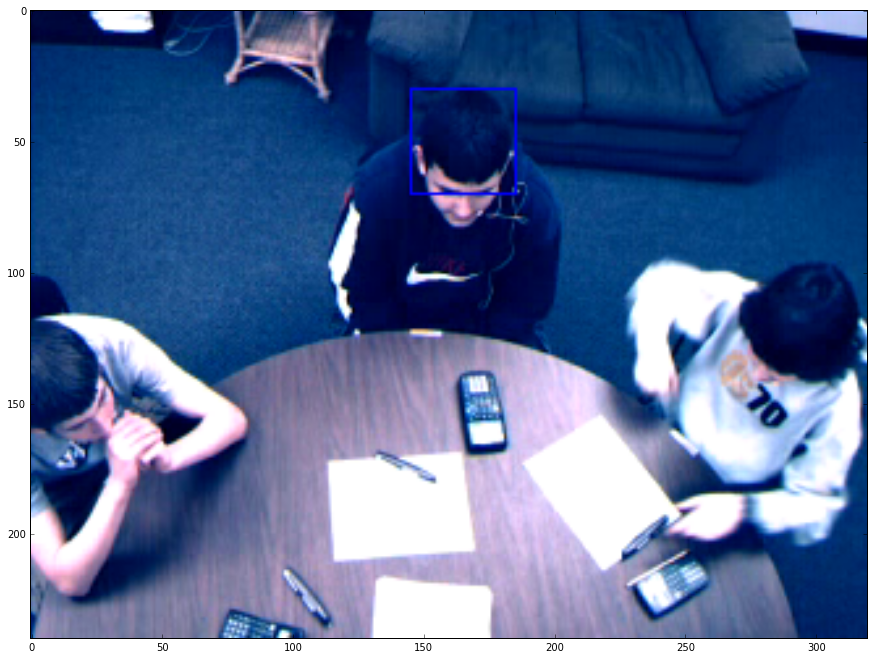

In [13]:
#Initializa the video
cap = cv2.VideoCapture('source/WIDE_cam1LowCopy.avi')
ret, frame = cap.read(1)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

#Define the area to be tracked (estimate from result)
bbox = (145, 30, 40, 40)
p1 = (int(bbox[0]), int(bbox[1]))
p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
cv2.rectangle(frame, p1, p2, (0,0,255))

#Show the selection in the image
ig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(frame)

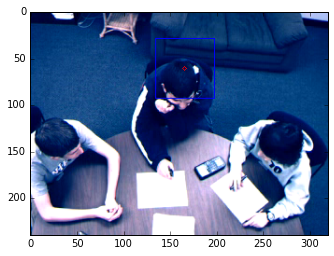

In [14]:
#Define the tracker
tracker = cv2.Tracker_create("MEDIANFLOW")
ok = tracker.init(frame, bbox)
framenumber=1

#Define the file to store
csvfile=open('results/head3.csv', 'w')
fieldnames = ['frame', 'head_X', 'head_Y']
writer = csv.DictWriter(csvfile, fieldnames=fieldnames)


#find the bounding box of the head in the 1000 first frames and store in a file

while framenumber<1000:
        framenumber=framenumber+1
        
        # Read a new frame
        ok, frame = cap.read(framenumber)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        if not ok:
            break
        
        # Update tracker
        ok, bbox = tracker.update(frame)
        
        # Calculate center of head
        centerx=bbox[0]+bbox[2]/2
        centery=bbox[1]+bbox[3]/2
        writer.writerow({'frame': framenumber, 'head_X': int(centerx), 'head_Y': int(centery)})
        
        # Draw bounding box
        if ok and framenumber%10==0:
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            center = (int(centerx),int(centery))
            cv2.rectangle(frame, p1, p2, (0,0,255))
            cv2.circle(frame,center,2,(255,0,0))
            plt.imshow(frame)
            plt.show()
            clear_output(wait=True)
        
csvfile.close()